Practical: 03
Asita Ganatra, 22070521003

Original Shape of Dataset: (178, 13)
Shape after PCA: (178, 13)


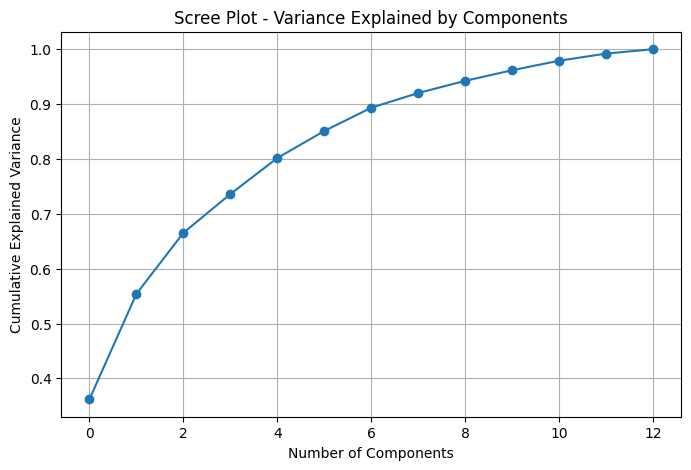

Reduced Shape (2D): (178, 2)


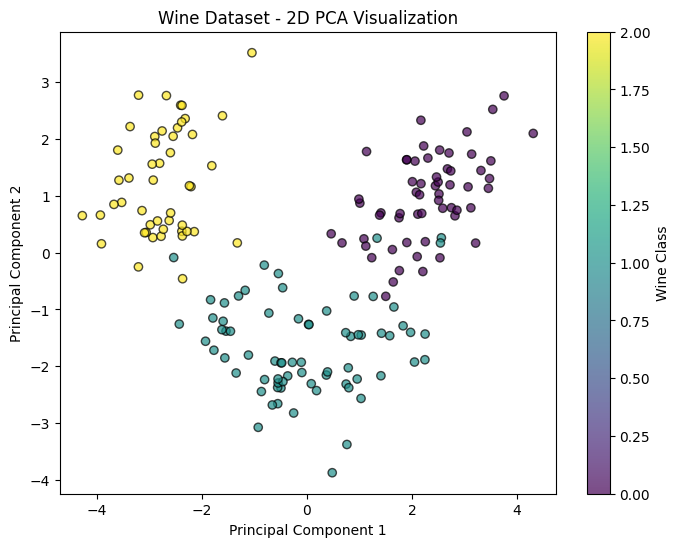


Before PCA: Dataset had 13 features
After PCA (2 components): Dataset has 2 features


In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#Load Dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

print("Original Shape of Dataset:", X.shape)  # (178 samples, 13 features)


#Standardize Data
# PCA is scale-sensitive, so we standardize features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#Apply PCA
# Keep all components first to analyze explained variance
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print("Shape after PCA:", X_pca.shape)


#Explained Variance (Scree Plot)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot - Variance Explained by Components")
plt.grid(True)
plt.show()


#Graph Description:
# This Scree Plot shows how much total variance is explained as we add more components.
#  The 'elbow point' indicates the optimal number of components to keep.

#Reduce to 2 Components for Visualization
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

print("Reduced Shape (2D):", X_pca_2.shape)  # (178, 2)


#Scatter Plot (2D PCA Visualization)
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca_2[:,0], X_pca_2[:,1],
                      c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Wine Dataset - 2D PCA Visualization")
plt.colorbar(scatter, label="Wine Class")
plt.show()


#Graph Description:
#  This 2D scatter plot shows the data projected on PC1 and PC2.
#  Colors represent different wine classes (0,1,2).
#  Points close together indicate similarity in the transformed PCA space.



#Compare Before vs After PCA
print("\nBefore PCA: Dataset had", X.shape[1], "features")
print("After PCA (2 components): Dataset has", X_pca_2.shape[1], "features")


#Output Description:
# Before PCA: 13 features.
# After PCA: Reduced to 2 principal components.
# PCA reduced dimensionality while retaining most variance, making data easier to visualize.